# Computation on Arrays: Broadcasting

We've seen how ufuncs can be used to vecotrize operations and speed up loops

Let's look at NumPy's __broadcasting__ functionality that can also be used, but on arrays of __different sizes__.

## Introducing Broadcasting

For arrays of the same size, binary operations are performed on an element-by-element basis:

In [1]:
import numpy as np

In [2]:
a = np.array([0, 1, 3])
b = np.array([5, 5, 5])
a + b

array([5, 6, 8])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [3]:
print(a)
a + 5

[0 1 3]


array([5, 6, 8])

N.B We can think of this as an operation that stretches or duplicates the value 5 into the array [5, 5, 5], and adds the results

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [4]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [5]:
M + a

array([[1., 2., 4.],
       [1., 2., 4.],
       [1., 2., 4.]])

Here the one-dimensional array a is *stretched*, or __broadcast__ across the second dimension in order to match the shape of M.

More complicated cases can involve broadcasting of both arrays. Consider the following example:

In [6]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [7]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

`a` and `b` have both been stretched to match a common shape

We can visualize as follows:

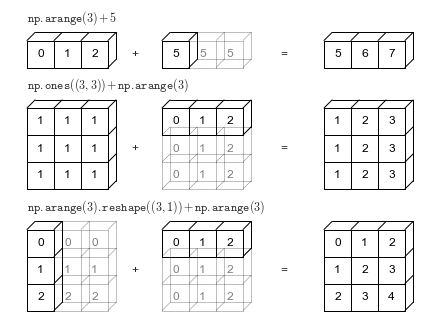

The light boxes represent the broadcasted values: again, this extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.

# Rules of Broadcasting

1. If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

2.  If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

3. If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

## Broadcasting Example:

In [8]:
# add a 2-D to a 1-D array
M = np.ones((2, 3))
a = np.arange(3)

In [9]:
print(M.shape)
print(a.shape)

(2, 3)
(3,)


Using Rule 1,  as `a` has fewer dimensions, it's shape is padded on the left with ones when performing an operation involving both arrays.

- `a.shape -> (1, 3)`

Using rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:
- `a.shape -> (2, 3)`

In [10]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

## Example 2

In [11]:
# both arrays need to be broadcast
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [12]:
a

array([[0],
       [1],
       [2]])

What are the shapes of each array?

In [13]:
print(a.shape)
print(b.shape)

(3, 1)
(3,)


By Rule 1, the shape of `b` must be padded:
- `b.shape -> (1, 3)`

By Rule 2, both must be upgraded to match the size of the corresponding array:
- `a.shape -> (3, 3)`
- `b.shape -> (3, 3)`

In [14]:
# adding can now occur
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Broadcasting example 3

In [19]:
# two arrays are not compatible
M = np.ones((3, 2))
a = np.arange(3)

In [20]:
M

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [17]:
print(M.shape)
print(a.shape)

(3, 2)
(3,)


R1: we pad the shape of `a`:

- `a.shape -> (1, 3)`



R2: the first dimension of `a` is stretched to match `b`:

- `M.shape -> (3, 2)`
- `a.shape -> (3, 3)`

Rule 3: If in an dimension the sizes disagree and neither is equal to 1, an error is raised as the shapes do not match

In [18]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

Is there anything that we could do to add the two arrays?

In [21]:
a[:, np.newaxis].shape

(3, 1)

In [22]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

## Broadcasting in Practice

So, we've had a look at how this can be used, but where might we use broadcasting?

We could use this for __centring__ an array of experimental data that may be used in a regression model:

- e.g an array of 10 observation consisting of 3 values each

In [25]:
X = np.random.random((10, 3))
X

array([[0.86430296, 0.66546607, 0.62055796],
       [0.80597585, 0.13777801, 0.1872666 ],
       [0.79249328, 0.82869997, 0.64491223],
       [0.30542521, 0.02849869, 0.76143443],
       [0.76149211, 0.21730162, 0.1192957 ],
       [0.69259431, 0.52863589, 0.5568352 ],
       [0.70847113, 0.42155174, 0.68753529],
       [0.47121121, 0.97956171, 0.69097642],
       [0.93781196, 0.33101622, 0.85627984],
       [0.34676294, 0.91529625, 0.41331008]])

In [26]:
# lets compute the mean of each feature in the data
Xmean = X.mean(0)
Xmean

array([0.6686541 , 0.50538062, 0.55384038])

In [27]:
# Now lets centre X by subtracting the mean
X_centred = X - Xmean

In [28]:
X_centred

array([[ 0.19564887,  0.16008545,  0.06671759],
       [ 0.13732176, -0.36760261, -0.36657377],
       [ 0.12383918,  0.32331935,  0.09107185],
       [-0.36322889, -0.47688193,  0.20759406],
       [ 0.09283801, -0.288079  , -0.43454468],
       [ 0.02394021,  0.02325527,  0.00299482],
       [ 0.03981704, -0.08382887,  0.13369492],
       [-0.19744289,  0.47418109,  0.13713605],
       [ 0.26915786, -0.17436439,  0.30243947],
       [-0.32189115,  0.40991564, -0.14053029]])

In [29]:
X_centred.mean(0)

array([5.55111512e-17, 0.00000000e+00, 9.99200722e-17])

N.B this is now very close to a 0 mean

## Plotting a two-dimensional function

If we want to define a function z=f(x,y), broadcasting can be used to compute the function across the grid:

In [39]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

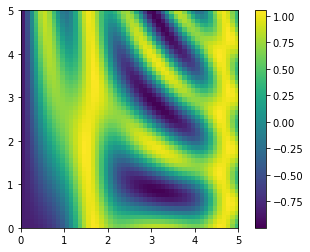

In [40]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();